# PROJECT PNEUMONIA - ELSA, OLOF AND ALBERNN

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

# Pre-processing

In [2]:
def loadimg(path, Exp, l1, l2):
    path1 = path+'/PNEUMONIA/'
    files=os.listdir(path1)
    i=0
    last=[]
    images=[]
    labels=[]
    for fle in files:
        idx=l2
        label=idx
        labels.append(label)
        total=path1+fle
        print(total+"   "+str(label))
        image= cv2.imread(total)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image= cv2.resize(image,(100,100))
        images.append(image)
        i += 1
        
    path2 = path+'/NORMAL/'
    files2=os.listdir(path2)
    k=0
    for fle2 in files2:
        idx=l1
        label=idx
        labels.append(label)
        total=path2+fle2
        print(total+"   "+str(label))
        image= cv2.imread(total)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image= cv2.resize(image,(100,100))
        images.append(image)
        k += 1
       
    images_f=np.array(images)
    images_f_2=images_f/255
    labels_f=np.array(labels)
    return images_f_2, images_f, labels_f

In [3]:
path_train = './chest_xray/chest_xray/train'
path_test = './chest_xray/chest_xray/test'
path_val = './chest_xray/chest_xray/val'
Exp=['pneumonia', 'normal']
X_test, show_test , Y_test = loadimg(path_test, Exp, 0, 1)
X_train, show_train, Y_train = loadimg(path_train, Exp, 0, 1)
X_val, show_val, Y_val = loadimg(path_val, Exp, 0, 1)

./chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_481.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person101_bacteria_484.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person101_bacteria_485.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person101_bacteria_486.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person102_bacteria_487.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person103_bacteria_488.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person103_bacteria_489.jpeg   1
./ches

./chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_661.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_662.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_663.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_664.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_665.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person139_bacteria_666.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person140_bacteria_667.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person140_bacteria_668.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person141_bacteria_670.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person141_bacteria_676.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person141_bacteria_677.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person141_bacteria_678.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person141_bacteria_681.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person142_bacteria_682.jpeg   1
./ches

./chest_xray/chest_xray/test/PNEUMONIA/person1679_virus_2896.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person1680_virus_2897.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person1682_virus_2899.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person1685_virus_2903.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person16_virus_47.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person171_bacteria_826.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person172_bacteria_827.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person172_bacteria_828.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person173_bacteria_829.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person173_bacteria_830.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person173_bacteria_831.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person174_bacteria_832.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person175_bacteria_833.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person175_bacteria_834.jpeg   1
./chest_xray/ch

./chest_xray/chest_xray/test/PNEUMONIA/person94_bacteria_457.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person94_bacteria_458.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person95_bacteria_463.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person96_bacteria_464.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person96_bacteria_465.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person96_bacteria_466.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person97_bacteria_468.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person99_bacteria_473.jpeg   1
./chest_xray/chest_xray/test/PNEUMONIA/person99_bacteria_474.jpeg   1
./chest_xray/chest_xray/test/NORMAL/IM-0001-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/IM-0003-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/IM-0005-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/IM-0006-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/IM-0007-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/IM-0009-0001.jpeg   0
./chest_xray/chest_xra

./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0213-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0217-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0221-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0222-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0229-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0232-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0233-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0237-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0238-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0241-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0246-0001-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0246-0001-0002.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0246-0001.jpeg   0
./chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0249-0001.jpeg   0


./chest_xray/chest_xray/train/PNEUMONIA/person1020_virus_1710.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1021_virus_1711.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1022_bacteria_2953.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1022_virus_1712.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1023_bacteria_2954.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1023_virus_1714.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1024_bacteria_2955.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1024_virus_1716.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1026_bacteria_2957.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1026_virus_1718.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1028_bacteria_2959.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1028_bacteria_2960.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1029_bacteria_2961.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1029_virus

./chest_xray/chest_xray/train/PNEUMONIA/person1087_bacteria_3027.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1087_virus_1799.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1088_bacteria_3028.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1089_bacteria_3029.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1089_virus_1808.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person108_virus_199.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person108_virus_200.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person108_virus_201.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1090_virus_1809.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1091_bacteria_3031.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1091_virus_1810.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1092_bacteria_3032.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1092_virus_1811.jpeg  

./chest_xray/chest_xray/train/PNEUMONIA/person1149_virus_1924.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1149_virus_1925.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person114_virus_217.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1150_bacteria_3095.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1151_virus_1928.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1152_virus_1930.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1153_virus_1932.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1154_bacteria_3099.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1154_virus_1933.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1155_bacteria_3100.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1155_virus_1934.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1156_bacteria_3101.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1156_virus_1935.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1156_virus_1936.jpeg 

./chest_xray/chest_xray/train/PNEUMONIA/person1212_virus_2057.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1213_virus_2058.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1214_bacteria_3166.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1214_virus_2059.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1215_bacteria_3167.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1216_bacteria_3168.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1216_virus_2062.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1217_bacteria_3169.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1217_virus_2063.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1218_bacteria_3171.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1218_virus_2066.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1219_bacteria_3172.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1219_virus_2067.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1220_bacteria

./chest_xray/chest_xray/train/PNEUMONIA/person1268_bacteria_3227.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1268_bacteria_3228.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1268_virus_2161.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1269_bacteria_3229.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1269_virus_2162.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person126_virus_255.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1270_bacteria_3230.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1270_virus_2163.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1271_bacteria_3231.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1271_virus_2164.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1272_bacteria_3232.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1272_virus_2190.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1273_bacteria_3233.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1273_bacteri

./chest_xray/chest_xray/train/PNEUMONIA/person1320_bacteria_3346.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1320_bacteria_3347.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1320_bacteria_3348.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1320_bacteria_3350.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1320_bacteria_3351.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1320_bacteria_3352.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1320_bacteria_3353.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1320_bacteria_3355.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1320_virus_2277.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1321_bacteria_3358.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1321_bacteria_3359.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1321_virus_2279.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1322_bacteria_3360.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/pers

./chest_xray/chest_xray/train/PNEUMONIA/person1369_virus_2355.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1369_virus_2356.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1371_virus_2361.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1371_virus_2362.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1372_bacteria_3498.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1372_bacteria_3499.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1372_bacteria_3500.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1372_bacteria_3501.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1372_bacteria_3502.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1372_bacteria_3503.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1374_bacteria_3506.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1374_bacteria_3507.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1374_virus_2365.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1375_ba

./chest_xray/chest_xray/train/PNEUMONIA/person1429_bacteria_3688.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1429_bacteria_3690.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1429_bacteria_3691.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1429_virus_2443.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person142_virus_288.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1430_bacteria_3693.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1430_bacteria_3694.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1430_bacteria_3695.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1430_bacteria_3696.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1430_bacteria_3697.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1430_virus_2444.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1431_bacteria_3698.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1432_bacteria_3699.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person143

./chest_xray/chest_xray/train/PNEUMONIA/person1478_bacteria_3848.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person147_virus_297.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1480_bacteria_3858.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1480_bacteria_3859.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1480_virus_2566.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3862.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3863.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3864.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3865.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3866.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3867.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3868.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1481_virus_2567.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person148

./chest_xray/chest_xray/train/PNEUMONIA/person1521_virus_2649.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1522_bacteria_3977.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1522_virus_2651.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1523_bacteria_3979.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1523_bacteria_3980.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1524_bacteria_3983.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1524_bacteria_3984.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1524_virus_2658.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1525_bacteria_3985.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1525_virus_2659.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1526_bacteria_3986.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1526_virus_2660.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1527_bacteria_3988.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1527_ba

./chest_xray/chest_xray/train/PNEUMONIA/person158_virus_312.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1590_bacteria_4174.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1590_bacteria_4175.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1590_bacteria_4176.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1590_virus_2764.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1591_bacteria_4177.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1591_virus_2765.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1592_bacteria_4178.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1592_virus_2766.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1593_virus_2767.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1594_bacteria_4182.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1594_virus_2768.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1595_bacteria_4183.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1595_virus_2

./chest_xray/chest_xray/train/PNEUMONIA/person1649_bacteria_4378.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1649_bacteria_4379.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1651_bacteria_4381.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1652_bacteria_4383.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1657_bacteria_4398.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1657_bacteria_4399.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1657_bacteria_4400.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1658_bacteria_4402.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1660_bacteria_4404.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1661_bacteria_4406.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1663_bacteria_4411.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1663_bacteria_4412.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1665_bacteria_4415.jpeg   1
./chest_xray/chest_xray/train/PNEUMONI

./chest_xray/chest_xray/train/PNEUMONIA/person1749_bacteria_4590.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1751_bacteria_4592.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1753_bacteria_4594.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1756_bacteria_4598.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1757_bacteria_4599.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1758_bacteria_4600.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1760_bacteria_4602.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1761_bacteria_4603.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1763_bacteria_4606.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1764_bacteria_4607.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1765_bacteria_4608.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1770_bacteria_4613.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1770_bacteria_4614.jpeg   1
./chest_xray/chest_xray/train/PNEUMONI

./chest_xray/chest_xray/train/PNEUMONIA/person1943_bacteria_4868.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1944_bacteria_4869.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1945_bacteria_4872.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person19_bacteria_58.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person19_bacteria_59.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person19_bacteria_60.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person19_bacteria_61.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person19_bacteria_62.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person19_bacteria_63.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person1_bacteria_2.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person20_bacteria_64.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person20_bacteria_66.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person20_bacteria_67.jpeg   1
./chest_xray

./chest_xray/chest_xray/train/PNEUMONIA/person263_virus_546.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1228.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1229.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1230.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1231.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1232.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1233.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person264_bacteria_1234.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person264_virus_547.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person265_bacteria_1235.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person265_bacteria_1236.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person265_virus_548.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person266_bacteria_1237.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person266_bacteria_1238

./chest_xray/chest_xray/train/PNEUMONIA/person293_virus_604.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person293_virus_605.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_bacteria_1380.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_bacteria_1381.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_bacteria_1382.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_bacteria_1383.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_bacteria_1384.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_bacteria_1385.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_bacteria_1386.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_bacteria_1388.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_virus_606.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_virus_610.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person294_virus_611.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person295_bacteria_1389.jpeg   

./chest_xray/chest_xray/train/PNEUMONIA/person319_bacteria_1476.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person319_bacteria_1477.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person319_bacteria_1478.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person319_bacteria_1479.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person319_bacteria_1480.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person319_virus_645.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person319_virus_646.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person31_bacteria_160.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person31_bacteria_161.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person31_bacteria_162.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person31_bacteria_163.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person31_bacteria_164.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person320_virus_647.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person321_bacteria_1483.jpeg   1


./chest_xray/chest_xray/train/PNEUMONIA/person347_bacteria_1599.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_bacteria_1601.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_bacteria_1602.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_bacteria_1603.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_bacteria_1604.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_711.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_714.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_715.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_716.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_717.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_719.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_720.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_721.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person348_virus_723.jpeg   1
./chest_xray/c

./chest_xray/chest_xray/train/PNEUMONIA/person376_bacteria_1716.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person376_virus_759.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person377_bacteria_1717.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person377_bacteria_1718.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person377_virus_760.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person378_virus_761.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person379_bacteria_1721.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person379_bacteria_1722.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person379_virus_762.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person37_bacteria_186.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person37_bacteria_187.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person37_bacteria_188.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person37_bacteria_189.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person380_virus_763.jpeg   1
./ches

./chest_xray/chest_xray/train/PNEUMONIA/person409_virus_818.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person409_virus_820.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person40_bacteria_202.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person40_bacteria_203.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person40_bacteria_204.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person40_bacteria_205.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person410_bacteria_1825.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person410_virus_821.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person411_bacteria_1826.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person412_bacteria_1827.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person413_bacteria_1828.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person413_bacteria_1829.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person413_bacteria_1830.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person413_bacteria_1831.jpeg   

./chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1918.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person441_virus_894.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person441_virus_895.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person441_virus_896.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person441_virus_897.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_898.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_899.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_900.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_901.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_902.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_903.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_904.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_905.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person442_virus_906.jpeg   1
./chest_xray/chest_xray/train/

./chest_xray/chest_xray/train/PNEUMONIA/person475_bacteria_2020.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person475_bacteria_2021.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person475_bacteria_2022.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person475_bacteria_2023.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person475_bacteria_2024.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person475_bacteria_2025.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person475_virus_972.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person476_bacteria_2026.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person476_virus_973.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person477_bacteria_2028.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person477_bacteria_2029.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person477_bacteria_2030.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person477_bacteria_2031.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person478_bacteria_

./chest_xray/chest_xray/train/PNEUMONIA/person508_bacteria_2143.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person508_bacteria_2144.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person508_virus_1020.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person508_virus_1021.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person509_bacteria_2145.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person509_bacteria_2146.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person509_virus_1024.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person509_virus_1025.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person50_bacteria_238.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person510_bacteria_2147.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person510_bacteria_2148.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person510_bacteria_2149.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person510_bacteria_2150.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person510_virus_1026.jpeg

./chest_xray/chest_xray/train/PNEUMONIA/person541_virus_1071.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person542_bacteria_2276.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person542_virus_1072.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person543_bacteria_2279.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person543_bacteria_2280.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person543_bacteria_2281.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person543_bacteria_2282.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person543_bacteria_2283.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person543_bacteria_2284.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person543_virus_1073.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person544_bacteria_2286.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person544_virus_1074.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person544_virus_1075.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person544_virus_1076.jpeg 

./chest_xray/chest_xray/train/PNEUMONIA/person576_bacteria_2376.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person576_virus_1120.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person577_bacteria_2378.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person577_virus_1121.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person578_bacteria_2379.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person578_virus_1122.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person579_bacteria_2381.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person579_bacteria_2382.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person579_bacteria_2383.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person579_bacteria_2384.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person579_bacteria_2386.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person579_virus_1123.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person57_bacteria_270.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person57_bacteria_271.jpe

./chest_xray/chest_xray/train/PNEUMONIA/person612_bacteria_2478.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person612_virus_1179.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person613_bacteria_2479.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person613_virus_1181.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person614_bacteria_2480.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person614_bacteria_2481.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person614_bacteria_2483.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person614_virus_1183.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person615_virus_1184.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person616_bacteria_2487.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person616_virus_1186.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person617_bacteria_2488.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person617_virus_1187.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person618_bacteria_2489.jpeg 

./chest_xray/chest_xray/train/PNEUMONIA/person661_virus_1245.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person662_bacteria_2554.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person662_virus_1246.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person663_bacteria_2555.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person663_virus_1247.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person663_virus_1248.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person664_virus_1249.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person665_bacteria_2557.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person665_virus_1250.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person666_bacteria_2558.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person666_virus_1251.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person667_virus_1252.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person667_virus_1253.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person669_bacteria_2561.jpeg   1
./che

./chest_xray/chest_xray/train/PNEUMONIA/person732_virus_1353.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person733_bacteria_2635.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person734_bacteria_2637.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person734_virus_1355.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person735_bacteria_2638.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person735_virus_1356.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person736_bacteria_2639.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person736_virus_1358.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person737_bacteria_2640.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person738_bacteria_2641.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person738_virus_1360.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person739_bacteria_2642.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person739_virus_1361.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person73_bacteria_355.jpeg   

./chest_xray/chest_xray/train/PNEUMONIA/person7_bacteria_25.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person7_bacteria_28.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person7_bacteria_29.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person800_bacteria_2706.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person801_virus_1434.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person802_bacteria_2708.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person803_bacteria_2710.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person803_virus_1436.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person804_bacteria_2711.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person805_bacteria_2712.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person806_virus_1439.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person806_virus_1440.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person807_virus_1441.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person808_bacteria_2716.jpeg   1
./che

./chest_xray/chest_xray/train/PNEUMONIA/person889_bacteria_2813.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person88_virus_161.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person88_virus_163.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person88_virus_164.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person88_virus_165.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person88_virus_166.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person88_virus_167.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person890_bacteria_2814.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person890_virus_1540.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person891_virus_1541.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person892_bacteria_2817.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person893_bacteria_2818.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person894_bacteria_2819.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person894_virus_1546.jpeg   1
./chest_xray/ches

./chest_xray/chest_xray/train/PNEUMONIA/person960_bacteria_2885.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person960_virus_1633.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person961_bacteria_2886.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person961_virus_1634.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person962_bacteria_2887.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person962_virus_1635.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person963_bacteria_2888.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person963_virus_1636.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person964_bacteria_2889.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person964_virus_1637.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person965_bacteria_2890.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person965_virus_1638.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person966_bacteria_2891.jpeg   1
./chest_xray/chest_xray/train/PNEUMONIA/person966_virus_1639.jpeg   1

./chest_xray/chest_xray/train/NORMAL/IM-0205-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0206-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0207-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0209-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0210-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0211-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0213-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0214-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0215-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0216-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0217-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0218-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0219-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0220-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0221-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0222-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0223-0001.jpeg  

./chest_xray/chest_xray/train/NORMAL/IM-0381-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0382-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0383-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0384-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0385-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0386-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0387-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0388-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0389-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0391-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0392-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0393-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0394-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0395-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0399-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0400-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0401-0001.jpeg  

./chest_xray/chest_xray/train/NORMAL/IM-0514-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0515-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0516-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0517-0001-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0517-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0519-0001-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0519-0001-0002.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0519-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0520-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0521-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0522-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0523-0001-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0523-0001-0002.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0523-0001-0003.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0523-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0524-0001.jpeg   0
./chest_xray/chest_xray/tr

./chest_xray/chest_xray/train/NORMAL/IM-0629-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0630-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0631-0001-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0631-0001-0002.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0631-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0632-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0633-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0634-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0635-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0636-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0637-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0640-0001-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0640-0001-0002.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0640-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0641-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/IM-0642-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL

./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0391-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0392-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0393-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0394-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0395-0001-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0395-0001-0002.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0395-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0396-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0397-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0399-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0401-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0402-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0403-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0404-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0406

./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0561-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0563-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0564-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0566-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0567-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0568-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0569-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0571-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0572-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0573-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0575-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0576-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0577-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0578-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0579-0001.jpeg

./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0790-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0793-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0796-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0797-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0798-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0799-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0803-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0804-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0806-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0807-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0808-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0809-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0810-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0811-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0812-0001.jpeg

./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0942-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0944-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0946-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0947-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0948-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0949-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0950-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0951-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0952-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0954-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0955-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0956-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0957-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0959-0001.jpeg

./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1112-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1113-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1114-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1116-0001-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1116-0001-0002.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1116-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1117-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1118-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1120-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1122-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1123-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1124-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1125-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1126-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1127

./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1269-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1270-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1271-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1272-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1273-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1274-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1275-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1276-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1277-0001-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1277-0001-0002.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1277-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1278-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1279-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1280-0001.jpeg   0
./chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1281

5216 16 624


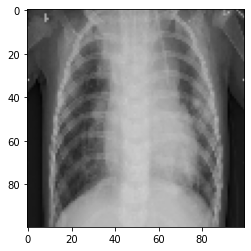

In [4]:
print(len(X_train), len(X_val), len(X_test))
plt.imshow(show_test[12])

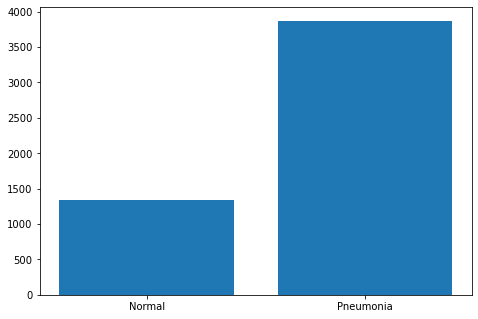

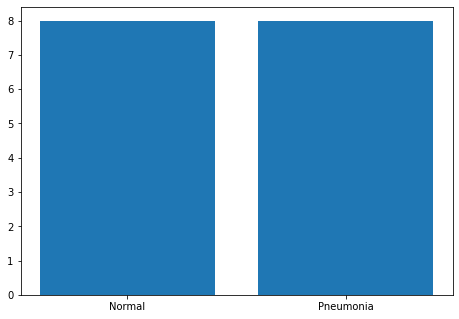

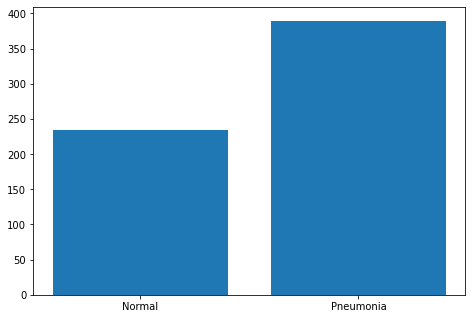

In [5]:
for k in [Y_train, Y_val, Y_test]:
    pneumonia = 0
    normal = 0
    for x in k:
        if x == 0:
            pneumonia += 1
        elif x == 1:
            normal += 1
        else: 
            print("error - not correct label")

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    text = ['Normal', 'Pneumonia']
    values=[pneumonia,normal]
    ax.bar(text,values)
    plt.show()

# help functions

In [6]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)
    return x

In [7]:
def test_image(ind,images_f,images_f_2,labels,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    print("Label actual:  " + Exp[labels[ind]]  )
    pred_1=Model.predict(np.array([image_test]))
    pred_class=Exp[int(np.argmax(pred_1))]
    print("Predicted Label: "+ pred_class)

# CNN self defined

## define model

In [30]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

def model1(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2, 2)) (conv_1)
    conv_2 = Convolution(maxp_1,32)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    conv_3 = Convolution(maxp_2,64)
    maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
    conv_4 = Convolution(maxp_2,64)
    maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
    flatten= Flatten() (maxp_4)
    dense_1= Dense(128,activation='relu')(flatten)
    dense_2= Dense(64,activation='relu')(dense_1)
    drop_1=Dropout(0.2)(dense_2)
    output= Dense(1,activation="sigmoid")(drop_1)
    
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
    return model

Model1=model1(input_shape = (100,100,3))
Model1.summary()

fle_1='CNN_bincrossentropy_adam.h5'
checkpointer = ModelCheckpoint(fle_1, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
dropout_16 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
activation_12 (Activation)   (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
dropout_17 (Dropout)         (None, 50, 50, 32)       

## train model

In [31]:
History1=Model1.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 0.2707 - accuracy: 0.9030
Epoch 00001: val_loss improved from inf to 0.55208, saving model to CNN_bincrossentropy_adam.h5
326/326 [==============================] - 34s 104ms/step - loss: 0.2707 - accuracy: 0.9030 - val_loss: 0.5521 - val_accuracy: 0.6875
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 0.1332 - accuracy: 0.9618
Epoch 00002: val_loss improved from 0.55208 to 0.27487, saving model to CNN_bincrossentropy_adam.h5
326/326 [==============================] - 34s 103ms/step - loss: 0.1332 - accuracy: 0.9618 - val_loss: 0.2749 - val_accuracy: 0.8125
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9701
Epoch 00003: val_loss did not improve from 0.27487
326/326 [==============================] - 32s 99ms/step - loss: 0.1079 - accuracy: 0.9701 - val_loss: 0.5181 - val_accuracy: 0.6875
Epoch 4/100
326/326 [==============================] - ETA: 0

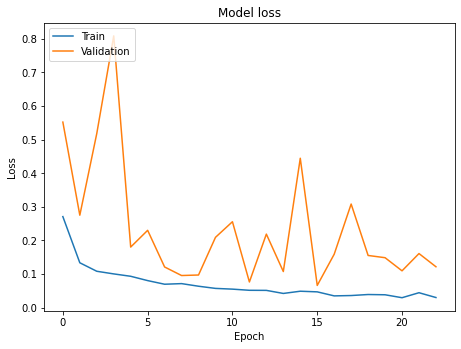

In [32]:
plt.plot(History1.history['loss'])
plt.plot(History1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

## load model

In [34]:
Model1 = tf.keras.models.load_model(fle_1)
print(Model1.summary())

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
dropout_16 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
activation_12 (Activation)   (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
dropout_17 (Dropout)         (None, 50, 50, 32)       

## evaluate

1/1 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 1.0000
              precision    recall  f1-score   support

      NORMAL       0.96      0.38      0.55       234
   PNEUMONIA       0.73      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.84      0.69      0.69       624
weighted avg       0.81      0.76      0.73       624



<AxesSubplot:>

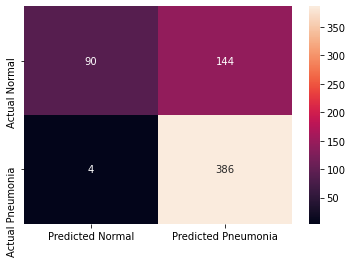

In [35]:
score = Model1.evaluate(X_train, Y_train)
score = Model1.evaluate(X_test, Y_test)
score = Model1.evaluate(X_val, Y_val)

Pred=Model1.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

Label actual:  pneumonia
Predicted Label: pneumonia


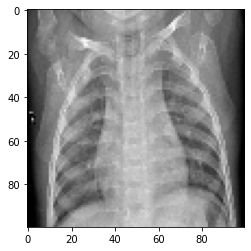

In [13]:
test_image(555,show_test,X_test,Y_test,Model1)

# RESNET CNN

## define model

In [36]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable=False

resnet = Sequential()
resnet.add(resnet_model)
resnet.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
resnet.add(layers.ReLU())
resnet.add(layers.MaxPooling2D(pool_size=(2,2)))
resnet.add(layers.Flatten())
resnet.add(layers.Dense(activation='relu', units=64))
resnet.add(layers.Dropout(0.2))
resnet.add(layers.Dense(activation='sigmoid', units=1))

resnet.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

resnet.summary()

fle_2='CNN_resnet.h5'
checkpointer = ModelCheckpoint(fle_2, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)               

## train model

In [37]:
History2=resnet.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 0.3732 - accuracy: 0.8380
Epoch 00001: val_loss improved from inf to 0.76848, saving model to CNN_resnet.h5
326/326 [==============================] - 43s 132ms/step - loss: 0.3732 - accuracy: 0.8380 - val_loss: 0.7685 - val_accuracy: 0.6875
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 0.2428 - accuracy: 0.8992
Epoch 00002: val_loss improved from 0.76848 to 0.55763, saving model to CNN_resnet.h5
326/326 [==============================] - 45s 138ms/step - loss: 0.2428 - accuracy: 0.8992 - val_loss: 0.5576 - val_accuracy: 0.7500
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 0.1962 - accuracy: 0.9208
Epoch 00003: val_loss did not improve from 0.55763
326/326 [==============================] - 42s 128ms/step - loss: 0.1962 - accuracy: 0.9208 - val_loss: 1.0466 - val_accuracy: 0.6250
Epoch 4/100
326/326 [==============================] - ETA: 0s - loss: 0.1825 - accuracy

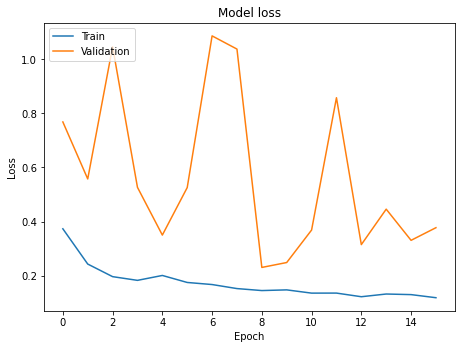

In [38]:
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

## load model

In [17]:
resnet = tf.keras.models.load_model(fle_2)
print(resnet.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu (ReLU)                 (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0

## evaluate

1/1 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.8750
              precision    recall  f1-score   support

      NORMAL       0.85      0.72      0.78       234
   PNEUMONIA       0.85      0.92      0.88       390

    accuracy                           0.85       624
   macro avg       0.85      0.82      0.83       624
weighted avg       0.85      0.85      0.84       624



<AxesSubplot:>

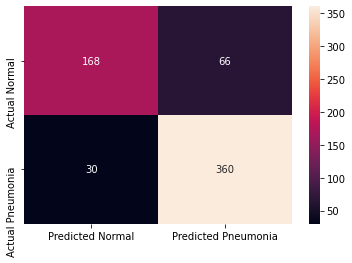

In [39]:
score = resnet.evaluate(X_train, Y_train)
score = resnet.evaluate(X_test, Y_test)
score = resnet.evaluate(X_val, Y_val)
Pred2=resnet.predict(X_test)
predictions2 = Pred2.copy()
predictions2[predictions2 <= 0.5] = 0
predictions2[predictions2 > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions2,target_names =['NORMAL','PNEUMONIA']))

cm2 = pd.DataFrame(data=confusion_matrix(Y_test, predictions2, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm2,annot=True,fmt="d")

Label actual:  pneumonia
Predicted Label: pneumonia


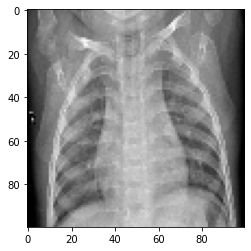

In [19]:
test_image(555,show_test,X_test,Y_test,resnet)

# RESNET MODEL WAS BETTER - USE THAT AND OMPIMIZE IT
## Use all loss functions with all optimizers to find the best network structure

# mse and adam model

In [56]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable=False

Model3 = Sequential()
Model3.add(resnet_model)
Model3.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
Model3.add(layers.ReLU())
Model3.add(layers.MaxPooling2D(pool_size=(2,2)))
Model3.add(layers.Flatten())
Model3.add(layers.Dense(activation='relu', units=64))
Model3.add(layers.Dropout(0.2))
Model3.add(layers.Dense(activation='sigmoid', units=1))

Model3.compile(loss="mse", optimizer="Adam", metrics=["accuracy"])
Model3.summary()

fle_3='resnet_mse_adam.h5'
checkpointer = ModelCheckpoint(fle_3, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)               

## train model

In [57]:
History3=Model3.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.8246
Epoch 00001: val_loss improved from inf to 0.28257, saving model to resnet_mse_adam.h5
326/326 [==============================] - 51s 156ms/step - loss: 0.1331 - accuracy: 0.8246 - val_loss: 0.2826 - val_accuracy: 0.6250
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.8903
Epoch 00002: val_loss improved from 0.28257 to 0.25091, saving model to resnet_mse_adam.h5
326/326 [==============================] - 56s 171ms/step - loss: 0.0815 - accuracy: 0.8903 - val_loss: 0.2509 - val_accuracy: 0.6250
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.9187
Epoch 00003: val_loss improved from 0.25091 to 0.16529, saving model to resnet_mse_adam.h5
326/326 [==============================] - 56s 172ms/step - loss: 0.0613 - accuracy: 0.9187 - val_loss: 0.1653 - val_accuracy: 0.8125
Epoch 4/100
326/326 [=================

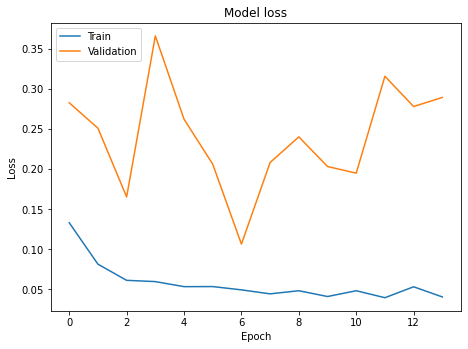

In [58]:
plt.plot(History3.history['loss'])
plt.plot(History3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

## load model

In [60]:
Model3 = tf.keras.models.load_model(fle_3)
print(Model3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)               

## evaluate

1/1 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.8750
              precision    recall  f1-score   support

      NORMAL       0.85      0.67      0.75       234
   PNEUMONIA       0.82      0.93      0.87       390

    accuracy                           0.83       624
   macro avg       0.84      0.80      0.81       624
weighted avg       0.83      0.83      0.83       624



<AxesSubplot:>

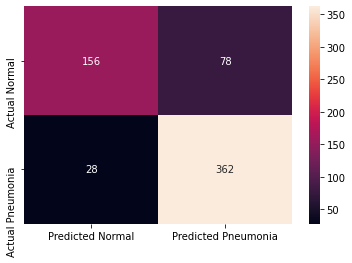

In [61]:
score = Model3.evaluate(X_train, Y_train)
score = Model3.evaluate(X_test, Y_test)
score = Model3.evaluate(X_val, Y_val)

Pred=Model3.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

# mse and sgd model

In [62]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable=False

Model4 = Sequential()
Model4.add(resnet_model)
Model4.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
Model4.add(layers.ReLU())
Model4.add(layers.MaxPooling2D(pool_size=(2,2)))
Model4.add(layers.Flatten())
Model4.add(layers.Dense(activation='relu', units=64))
Model4.add(layers.Dropout(0.2))
Model4.add(layers.Dense(activation='sigmoid', units=1))

Model4.compile(loss="mse", optimizer="SGD", metrics=["accuracy"])
Model4.summary()

fle_4='resnet_mse_sgd.h5'
checkpointer = ModelCheckpoint(fle_4, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)               

## train model

In [63]:
History4=Model4.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 0.1927 - accuracy: 0.7377
Epoch 00001: val_loss improved from inf to 0.31381, saving model to resnet_mse_sgd.h5
326/326 [==============================] - 52s 160ms/step - loss: 0.1927 - accuracy: 0.7377 - val_loss: 0.3138 - val_accuracy: 0.5000
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 0.1791 - accuracy: 0.7437
Epoch 00002: val_loss improved from 0.31381 to 0.26615, saving model to resnet_mse_sgd.h5
326/326 [==============================] - 52s 160ms/step - loss: 0.1791 - accuracy: 0.7437 - val_loss: 0.2661 - val_accuracy: 0.5000
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.7789
Epoch 00003: val_loss improved from 0.26615 to 0.22585, saving model to resnet_mse_sgd.h5
326/326 [==============================] - 52s 159ms/step - loss: 0.1542 - accuracy: 0.7789 - val_loss: 0.2259 - val_accuracy: 0.6250
Epoch 4/100
326/326 [====================

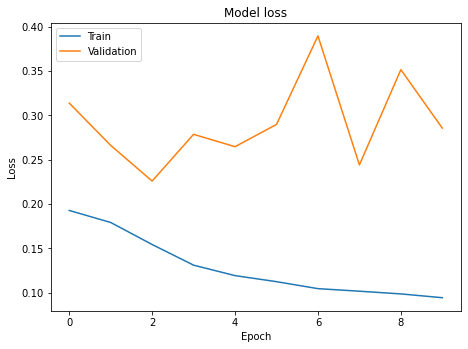

In [64]:
plt.plot(History4.history['loss'])
plt.plot(History4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

## load model

In [67]:
Model4 = tf.keras.models.load_model(fle_4)
print(Model4.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)               

## evaluate

1/1 [==============================] - 0s 997us/step - loss: 0.2259 - accuracy: 0.6250
              precision    recall  f1-score   support

      NORMAL       0.82      0.66      0.73       234
   PNEUMONIA       0.82      0.92      0.86       390

    accuracy                           0.82       624
   macro avg       0.82      0.79      0.80       624
weighted avg       0.82      0.82      0.82       624



<AxesSubplot:>

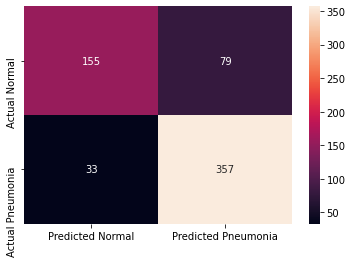

In [68]:
score = Model4.evaluate(X_train, Y_train)
score = Model4.evaluate(X_test, Y_test)
score = Model4.evaluate(X_val, Y_val)

Pred=Model4.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

# bin crossentropy and sgd model

In [121]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable=False

Model5 = Sequential()
Model5.add(resnet_model)
Model5.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
Model5.add(layers.ReLU())
Model5.add(layers.MaxPooling2D(pool_size=(2,2)))
Model5.add(layers.Flatten())
Model5.add(layers.Dense(activation='relu', units=64))
Model5.add(layers.Dropout(0.2))
Model5.add(layers.Dense(activation='sigmoid', units=1))

Model5.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])
Model5.summary()

fle_5='resnet_bincrossentropy_sgd.h5'
checkpointer = ModelCheckpoint(fle_5, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_30 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_55 (Dropout)         (None, 64)              

## train model

In [122]:
History5=Model5.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.7416
Epoch 00001: val_loss improved from inf to 0.93898, saving model to resnet_bincrossentropy_sgd.h5
326/326 [==============================] - 154s 472ms/step - loss: 0.5758 - accuracy: 0.7416 - val_loss: 0.9390 - val_accuracy: 0.5000
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 0.5156 - accuracy: 0.7435
Epoch 00002: val_loss improved from 0.93898 to 0.69825, saving model to resnet_bincrossentropy_sgd.h5
326/326 [==============================] - 156s 478ms/step - loss: 0.5156 - accuracy: 0.7435 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 0.4581 - accuracy: 0.7786
Epoch 00003: val_loss improved from 0.69825 to 0.55973, saving model to resnet_bincrossentropy_sgd.h5
326/326 [==============================] - 156s 479ms/step - loss: 0.4581 - accuracy: 0.7786 - val_loss: 0.5597 - val_accuracy: 0.6875
Ep

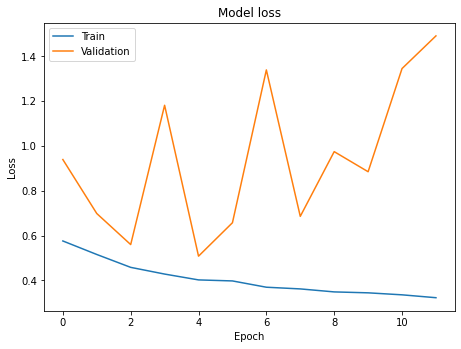

In [123]:
plt.plot(History5.history['loss'])
plt.plot(History5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

## load model

In [124]:
Model5 = tf.keras.models.load_model(fle_5)
print(Model5.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_30 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_55 (Dropout)         (None, 64)              

## evaluate

1/1 [==============================] - 0s 997us/step - loss: 0.5081 - accuracy: 0.7500
              precision    recall  f1-score   support

      NORMAL       0.63      0.89      0.74       234
   PNEUMONIA       0.91      0.68      0.78       390

    accuracy                           0.76       624
   macro avg       0.77      0.79      0.76       624
weighted avg       0.81      0.76      0.77       624



<AxesSubplot:>

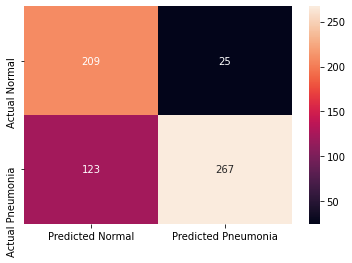

In [125]:
score = Model5.evaluate(X_train, Y_train)
score = Model5.evaluate(X_test, Y_test)
score = Model5.evaluate(X_val, Y_val)

Pred=Model5.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

# bin crossentropy and rmsprop model

In [126]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable=False

Model6 = Sequential()
Model6.add(resnet_model)
Model6.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
Model6.add(layers.ReLU())
Model6.add(layers.MaxPooling2D(pool_size=(2,2)))
Model6.add(layers.Flatten())
Model6.add(layers.Dense(activation='relu', units=64))
Model6.add(layers.Dropout(0.2))
Model6.add(layers.Dense(activation='sigmoid', units=1))

Model6.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
Model6.summary()

fle_6='resnet_bincrossentropy_rmsprop.h5'
checkpointer = ModelCheckpoint(fle_6, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_31 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_56 (Dropout)         (None, 64)              

## train model

In [127]:
History6=Model6.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 0.4963 - accuracy: 0.7868
Epoch 00001: val_loss improved from inf to 0.94900, saving model to resnet_bincrossentropy_rmsprop.h5
326/326 [==============================] - 158s 484ms/step - loss: 0.4963 - accuracy: 0.7868 - val_loss: 0.9490 - val_accuracy: 0.5625
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 0.3160 - accuracy: 0.8620
Epoch 00002: val_loss improved from 0.94900 to 0.69135, saving model to resnet_bincrossentropy_rmsprop.h5
326/326 [==============================] - 158s 485ms/step - loss: 0.3160 - accuracy: 0.8620 - val_loss: 0.6913 - val_accuracy: 0.6875
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 0.2752 - accuracy: 0.8861
Epoch 00003: val_loss improved from 0.69135 to 0.62210, saving model to resnet_bincrossentropy_rmsprop.h5
326/326 [==============================] - 156s 479ms/step - loss: 0.2752 - accuracy: 0.8861 - val_loss: 0.6221 - val_accurac

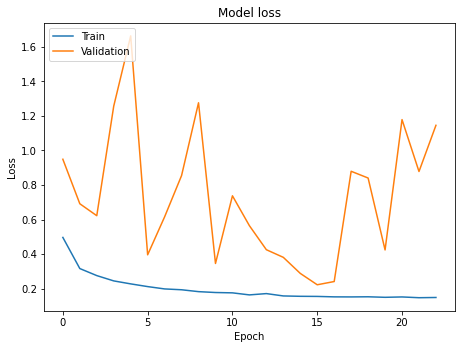

In [128]:
plt.plot(History6.history['loss'])
plt.plot(History6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

## load model

In [129]:
Model6 = tf.keras.models.load_model(fle_6)
print(Model6.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_31 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_56 (Dropout)         (None, 64)              

## evaluate

1/1 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9375
              precision    recall  f1-score   support

      NORMAL       0.86      0.70      0.77       234
   PNEUMONIA       0.84      0.93      0.88       390

    accuracy                           0.84       624
   macro avg       0.85      0.82      0.83       624
weighted avg       0.85      0.84      0.84       624



<AxesSubplot:>

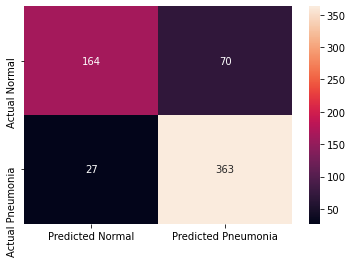

In [130]:
score = Model6.evaluate(X_train, Y_train)
score = Model6.evaluate(X_test, Y_test)
score = Model6.evaluate(X_val, Y_val)

Pred=Model6.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

# mse and rmsprop model

In [131]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable=False

Model7 = Sequential()
Model7.add(resnet_model)
Model7.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
Model7.add(layers.ReLU())
Model7.add(layers.MaxPooling2D(pool_size=(2,2)))
Model7.add(layers.Flatten())
Model7.add(layers.Dense(activation='relu', units=64))
Model7.add(layers.Dropout(0.2))
Model7.add(layers.Dense(activation='sigmoid', units=1))

Model7.compile(loss="mse", optimizer="RMSprop", metrics=["accuracy"])
Model7.summary()

fle_7='resnet_mse_rmsprop.h5'
checkpointer = ModelCheckpoint(fle_7, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_32 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_57 (Dropout)         (None, 64)              

## train model

In [132]:
History7=Model7.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 0.1707 - accuracy: 0.7728
Epoch 00001: val_loss improved from inf to 0.34896, saving model to resnet_mse_rmsprop.h5
326/326 [==============================] - 158s 486ms/step - loss: 0.1707 - accuracy: 0.7728 - val_loss: 0.3490 - val_accuracy: 0.5625
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 0.8581
Epoch 00002: val_loss improved from 0.34896 to 0.33503, saving model to resnet_mse_rmsprop.h5
326/326 [==============================] - 162s 496ms/step - loss: 0.1023 - accuracy: 0.8581 - val_loss: 0.3350 - val_accuracy: 0.5625
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.8813
Epoch 00003: val_loss improved from 0.33503 to 0.25307, saving model to resnet_mse_rmsprop.h5
326/326 [==============================] - 161s 495ms/step - loss: 0.0853 - accuracy: 0.8813 - val_loss: 0.2531 - val_accuracy: 0.6250
Epoch 4/100
326/326 [=====

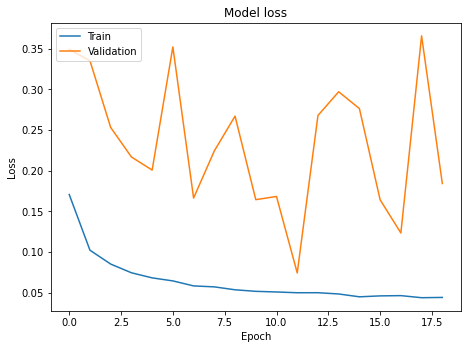

In [133]:
plt.plot(History7.history['loss'])
plt.plot(History7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

## load model

In [134]:
Model7 = tf.keras.models.load_model(fle_7)
print(Model7.summary())

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_32 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_57 (Dropout)         (None, 64)              

## evaluate

1/1 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.8750
              precision    recall  f1-score   support

      NORMAL       0.86      0.66      0.74       234
   PNEUMONIA       0.82      0.93      0.87       390

    accuracy                           0.83       624
   macro avg       0.84      0.80      0.81       624
weighted avg       0.83      0.83      0.82       624



<AxesSubplot:>

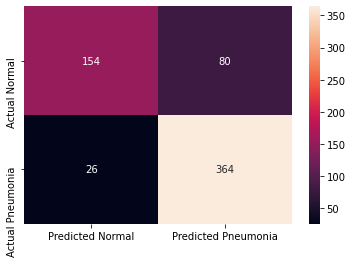

In [135]:
score = Model7.evaluate(X_train, Y_train)
score = Model7.evaluate(X_test, Y_test)
score = Model7.evaluate(X_val, Y_val)

Pred=Model7.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

# LR OPTIMIZER

## run best network structure with 5 different lr and save each trained model

In [98]:
lr = [0.1, 0.01, 0.001, 0.0001]
for q in lr:
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Flatten,BatchNormalization
    from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
    from tensorflow.keras.layers import Input,Activation,Add
    from tensorflow.keras.models import Model
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import ModelCheckpoint
    
    print("------------------------"+str(q)+"--------------------------")

    input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

    resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

    for layer in resnet_model.layers:
        layer.trainable=False

    Modellr = Sequential()
    Modellr.add(resnet_model)
    Modellr.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
    Modellr.add(layers.ReLU())
    Modellr.add(layers.MaxPooling2D(pool_size=(2,2)))
    Modellr.add(layers.Flatten())
    Modellr.add(layers.Dense(activation='relu', units=64))
    Modellr.add(layers.Dropout(0.2))
    Modellr.add(layers.Dense(activation='sigmoid', units=1))
    
    opt = keras.optimizers.Adam(learning_rate=q)
    Modellr.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    Modellr.summary()
    
    fle_lr='CNN_lr_'+str(q)+'.h5'
    checkpointer = ModelCheckpoint(fle_lr, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
    Early_stop=tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss',restore_best_weights=True),
    callback_list=[checkpointer,Early_stop]
    
    Historylr=Modellr.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])
    
    print(Modellr.evaluate(X_train, Y_train))
    print(Modellr.evaluate(X_test, Y_test))
    print(Modellr.evaluate(X_val, Y_val))
    
    Pred=Modellr.predict(X_test)
    predictions = Pred.copy()
    predictions[predictions <= 0.5] = 0
    predictions[predictions > 0.5] = 1

    print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

    print("-----------------------------------------------------------------------------")

------------------------0.1--------------------------
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_21 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                2112      
_________________________________________________________________

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624

-----------------------------------------------------------------------------
------------------------0.01--------------------------
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_22 (ReLU)              (None, 2, 2, 32)          0         
_______________________________________________________

Epoch 6/100
326/326 [==============================] - ETA: 0s - loss: 0.1620 - accuracy: 0.9369
Epoch 00006: val_loss did not improve from 0.56721
326/326 [==============================] - 140s 428ms/step - loss: 0.1620 - accuracy: 0.9369 - val_loss: 0.6840 - val_accuracy: 0.6250
Epoch 7/100
326/326 [==============================] - ETA: 0s - loss: 0.1536 - accuracy: 0.9411
Epoch 00007: val_loss did not improve from 0.56721
326/326 [==============================] - 139s 428ms/step - loss: 0.1536 - accuracy: 0.9411 - val_loss: 0.7364 - val_accuracy: 0.6875
Epoch 8/100
326/326 [==============================] - ETA: 0s - loss: 0.1440 - accuracy: 0.9436
Epoch 00008: val_loss improved from 0.56721 to 0.48238, saving model to CNN_lr_0.001.h5
326/326 [==============================] - 140s 428ms/step - loss: 0.1440 - accuracy: 0.9436 - val_loss: 0.4824 - val_accuracy: 0.8125
Epoch 9/100
326/326 [==============================] - ETA: 0s - loss: 0.1459 - accuracy: 0.9408
Epoch 00009: val_

326/326 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.9055
Epoch 00004: val_loss improved from 0.88698 to 0.64928, saving model to CNN_lr_0.0001.h5
326/326 [==============================] - 147s 452ms/step - loss: 0.2325 - accuracy: 0.9055 - val_loss: 0.6493 - val_accuracy: 0.6875
Epoch 5/100
326/326 [==============================] - ETA: 0s - loss: 0.2084 - accuracy: 0.9172
Epoch 00005: val_loss did not improve from 0.64928
326/326 [==============================] - 146s 449ms/step - loss: 0.2084 - accuracy: 0.9172 - val_loss: 0.9358 - val_accuracy: 0.6250
Epoch 6/100
326/326 [==============================] - ETA: 0s - loss: 0.1908 - accuracy: 0.9231
Epoch 00006: val_loss improved from 0.64928 to 0.45917, saving model to CNN_lr_0.0001.h5
326/326 [==============================] - 147s 450ms/step - loss: 0.1908 - accuracy: 0.9231 - val_loss: 0.4592 - val_accuracy: 0.7500
Epoch 7/100
326/326 [==============================] - ETA: 0s - loss: 0.1757 - accurac

## load each model and check which one is best

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_21 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_46 (Dropout)         (None, 64)              

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

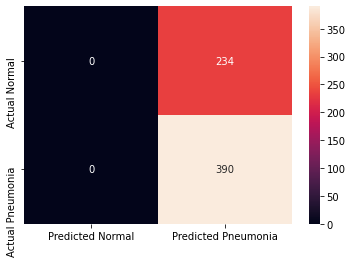

In [114]:
# 0.1
fle_lr='CNN_lr_0.1.h5'
Modellr = tf.keras.models.load_model(fle_lr)
print(Modellr.summary())

score = Modellr.evaluate(X_train, Y_train)
score = Modellr.evaluate(X_test, Y_test)
score = Modellr.evaluate(X_val, Y_val)

Pred=Modellr.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
# 0.01
fle_lr='CNN_lr_0.01.h5'
Modellr = tf.keras.models.load_model(fle_lr)
print(Modellr.summary())

score = Modellr.evaluate(X_train, Y_train)
score = Modellr.evaluate(X_test, Y_test)
score = Modellr.evaluate(X_val, Y_val)

Pred=Modellr.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
# 0.001 --> our fist network had this and was better than the one in the lr test
fle_lr='CNN_resnet.h5'
Modellr = tf.keras.models.load_model(fle_lr)
print(Modellr.summary())

score = Modellr.evaluate(X_train, Y_train)
score = Modellr.evaluate(X_test, Y_test)
score = Modellr.evaluate(X_val, Y_val)

Pred=Modellr.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
# 0.0001
fle_lr='CNN_lr_0.0001.h5'
Modellr = tf.keras.models.load_model(fle_lr)
print(Modellr.summary())

score = Modellr.evaluate(X_train, Y_train)
score = Modellr.evaluate(X_test, Y_test)
score = Modellr.evaluate(X_val, Y_val)

Pred=Modellr.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

# t-SNE visualization of best network

## define model

In [107]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable=False

Model8 = Sequential()
Model8.add(resnet_model)
Model8.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
Model8.add(layers.ReLU())
Model8.add(layers.MaxPooling2D(pool_size=(2,2)))
Model8.add(layers.Flatten(name="flattenlayer"))
Model8.add(layers.Dense(activation='relu', units=64))
Model8.add(layers.Dropout(0.2))
Model8.add(layers.Dense(activation='sigmoid', units=1))

opt = keras.optimizers.Adam(learning_rate=0.01)
Model8.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
Model8.summary() 

fle_8='CNN_final_tsne.h5'


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_27 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flattenlayer (Flatten)       (None, 32)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_52 (Dropout)         (None, 64)              

## train one epoch

In [108]:
checkpointer = ModelCheckpoint(fle_8, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=1, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]
History8=Model8.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=1,callbacks=[callback_list])

326/326 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8420
Epoch 00001: val_loss improved from inf to 0.99219, saving model to CNN_final_tsne.h5
326/326 [==============================] - 139s 425ms/step - loss: 0.3688 - accuracy: 0.8420 - val_loss: 0.9922 - val_accuracy: 0.5625


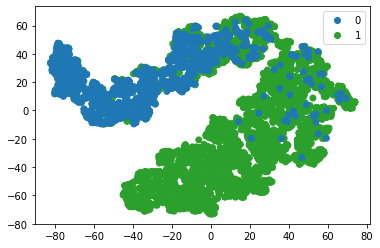

In [109]:
extractor = keras.Model(inputs=Model8.inputs,outputs=Model8.get_layer(name="flattenlayer").output)
intermediate_output = extractor.predict(X_train)

def doTSNE(data):
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2).fit_transform(data)
    return tsne

transformed_data = doTSNE(intermediate_output)


from matplotlib.colors import ListedColormap
classes = ['0', '1']
colors = ListedColormap(["tab:blue","tab:green"])
values = []
i = 0
for point, label in zip(transformed_data, Y_train):
    #print(f"[{i}]/[5000]", end="\r", flush=True)
    value = label
    values.append(value)
    i += 1
scatter = plt.scatter(x=transformed_data[:, 0], y=transformed_data[:, 1], c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

## Train model fully

In [112]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

input_tensor = Input(shape=(100, 100, 3))  # this assumes K.image_data_format() == 'channels_last'

resnet_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable=False

Model8 = Sequential()
Model8.add(resnet_model)
Model8.add(layers.Conv2D(32, kernel_size=(3,3), strides=(3,3), activation='relu', padding='same', input_shape=(100, 100, 1)))
Model8.add(layers.ReLU())
Model8.add(layers.MaxPooling2D(pool_size=(2,2)))
Model8.add(layers.Flatten(name="flattenlayer"))
Model8.add(layers.Dense(activation='relu', units=64))
Model8.add(layers.Dropout(0.2))
Model8.add(layers.Dense(activation='sigmoid', units=1))

Model8.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
Model8.summary() 

fle_8='CNN_final_tsne2.h5'

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_29 (ReLU)              (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flattenlayer (Flatten)       (None, 32)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_54 (Dropout)         (None, 64)              

In [113]:
checkpointer = ModelCheckpoint(fle_8, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]
History8=Model8.fit(X_train,Y_train,batch_size=16,validation_data=(X_val,Y_val),epochs=100,callbacks=[callback_list])

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 0.4110 - accuracy: 0.8248
Epoch 00001: val_loss improved from inf to 0.72465, saving model to CNN_final_tsne2.h5
326/326 [==============================] - 148s 453ms/step - loss: 0.4110 - accuracy: 0.8248 - val_loss: 0.7246 - val_accuracy: 0.6875
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 0.2589 - accuracy: 0.8909
Epoch 00002: val_loss did not improve from 0.72465
326/326 [==============================] - 148s 453ms/step - loss: 0.2589 - accuracy: 0.8909 - val_loss: 0.7324 - val_accuracy: 0.6875
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 0.2040 - accuracy: 0.9178
Epoch 00003: val_loss improved from 0.72465 to 0.39881, saving model to CNN_final_tsne2.h5
326/326 [==============================] - 146s 448ms/step - loss: 0.2040 - accuracy: 0.9178 - val_loss: 0.3988 - val_accuracy: 0.7500
Epoch 4/100
326/326 [==============================] - ETA: 0s - loss: 0.19

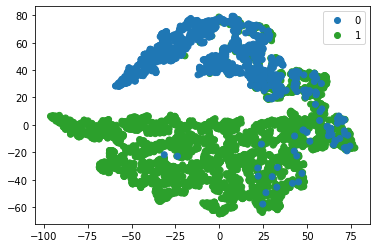

In [115]:
extractor = keras.Model(inputs=Model8.inputs,outputs=Model8.get_layer(name="flattenlayer").output)
intermediate_output = extractor.predict(X_train)

def doTSNE(data):
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2).fit_transform(data)
    return tsne

transformed_data = doTSNE(intermediate_output)


from matplotlib.colors import ListedColormap
classes = ['0', '1']
colors = ListedColormap(["tab:blue","tab:green"])
values = []
i = 0
for point, label in zip(transformed_data, Y_train):
    #print(f"[{i}]/[5000]", end="\r", flush=True)
    value = label
    values.append(value)
    i += 1
scatter = plt.scatter(x=transformed_data[:, 0], y=transformed_data[:, 1], c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

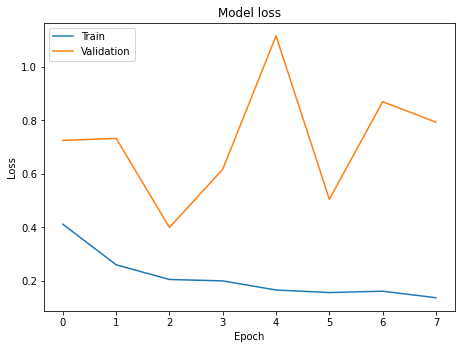

In [116]:
plt.plot(History8.history['loss'])
plt.plot(History8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

## load model

In [118]:
Model8 = tf.keras.models.load_model(fle_2)
print(Model8.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 32)          589856    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)               

## evaluate

1/1 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.8750
              precision    recall  f1-score   support

      NORMAL       0.85      0.72      0.78       234
   PNEUMONIA       0.85      0.92      0.88       390

    accuracy                           0.85       624
   macro avg       0.85      0.82      0.83       624
weighted avg       0.85      0.85      0.84       624



<AxesSubplot:>

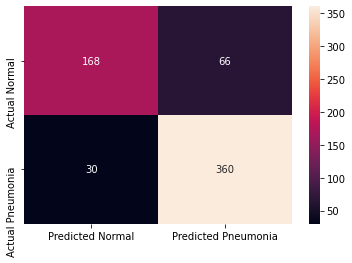

In [119]:
score = Model8.evaluate(X_train, Y_train)
score = Model8.evaluate(X_test, Y_test)
score = Model8.evaluate(X_val, Y_val)

Pred=Model8.predict(X_test)
predictions = Pred.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(classification_report(y_true=Y_test,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

cm = pd.DataFrame(data=confusion_matrix(Y_test, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")